# <center> **DATA SCIENCE 2: ASSIGNMENT 2** 

### <center> *Ian Brandenburg (2304791)* <center> [GitHub Repo](https://github.com/Iandrewburg/Data_Science/tree/main/Data_Science_2/Assignments/Assignment_2)
---

    
Take the alternative version of the famous “MNIST dataset”, which consists of images of Zalando’s articles. Your task is to correctly classify the images into one of the ten categories, such as dress or shirt. The images are in exactly the same format as we saw for the handwritten digits: 28x28 pixel grayscale images. The task is to build deep neural network models to predict the items. You can use either sklearn or keras; to get the data, go to the corresponding Kaggle page or use the fashion_mnist.load_data() function from the keras.datasets module. Make sure you split the training set into two sets: one for training your models on and one for validation and model selection. You can work with a relatively small train set if you have computational problems.

### 1. What would be an appropriate metric to evaluate your models? Why? 
---

An appropriate metric to evalute the models train on the Fashion MNIST data set would be the accuracy metric, since the dataset is a multi-class classification problem with balanced classes. The accuracy metric calculates the number of correctly predicted observations to the total number of observations. This provides a very straightforward assessment of the models' performance across the 10 different categories. 

### 2. Get the data and show some example images from the data.
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# TensorFlow's Keras API
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (BatchNormalization, Conv2D, Dense, Dropout, Flatten, 
                                     GlobalAveragePooling2D, MaxPooling2D, Rescaling)
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.utils import to_categorical

# Scikit-learn
from sklearn.model_selection import train_test_split


In [2]:
def plot_model_history(model_histories, labels):
    """Plot the training and validation accuracy and loss for multiple models."""
    if not model_histories or not labels or len(model_histories) != len(labels):
        print("The model histories and labels must be provided and match in length.")
        return

    plt.figure(figsize=(14, 5))

    # plotting training & validation accuracy
    plt.subplot(1, 2, 1)
    for model_history, label in zip(model_histories, labels):
        epochs = range(1, len(model_history.history['accuracy']) + 1)
        plt.plot(epochs, model_history.history['accuracy'], label=f'Training Acc {label}')
        plt.plot(epochs, model_history.history['val_accuracy'], label=f'Validation Acc {label}', linestyle="--")
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # plotting training & validation loss
    plt.subplot(1, 2, 2)
    for model_history, label in zip(model_histories, labels):
        epochs = range(1, len(model_history.history['loss']) + 1)
        plt.plot(epochs, model_history.history['loss'], label=f'Training Loss {label}')
        plt.plot(epochs, model_history.history['val_loss'], label=f'Validation Loss {label}', linestyle="--")
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [3]:
# loading the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# converting labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# splitting the training data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=20240405)

# checking the shape of the datasets
print("Training set shape:", train_images.shape)
print("Validation set shape:", val_images.shape)
print("Test set shape:", test_images.shape)


Training set shape: (48000, 28, 28)
Validation set shape: (12000, 28, 28)
Test set shape: (10000, 28, 28)


In [4]:
print("Y Test set shape:", test_labels.shape)

Y Test set shape: (10000, 10)


Training Images:


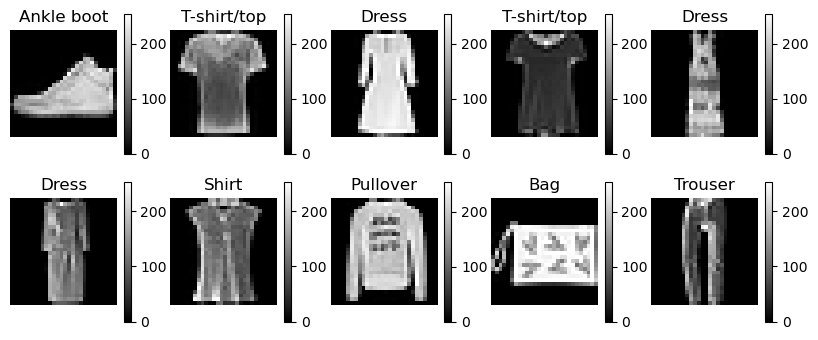

Validation Images:


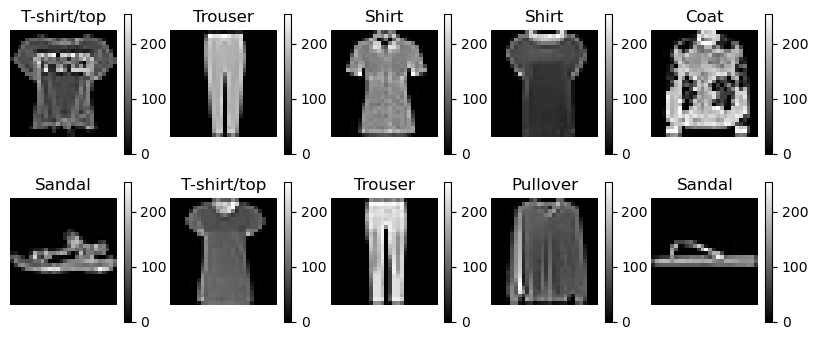

Test Images:


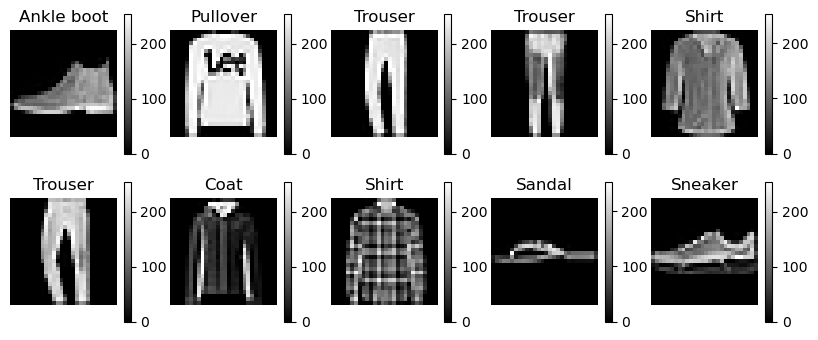

In [5]:
def show_images(images, labels, nrows=1, ncols=5, class_names=None):
    """Display a grid of images and their labels."""
    plt.figure(figsize=(10, 2 * nrows))
    for i in range(nrows * ncols):
        plt.subplot(nrows, ncols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.colorbar()
        if class_names is not None:
            plt.title(class_names[np.argmax(labels[i])])
        else:
            plt.title(np.argmax(labels[i]))
        plt.axis('off')
    plt.show()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Showing training images
print("Training Images:")
show_images(train_images, train_labels, nrows=2, ncols=5, class_names=class_names)

# Showing validation images
print("Validation Images:")
show_images(val_images, val_labels, nrows=2, ncols=5, class_names=class_names)

# Showing testing images
print("Test Images:")
show_images(test_images, test_labels, nrows=2, ncols=5, class_names=class_names)


### 3. Train a simple fully connected single hidden layer network to predict the items. 

- Remember to normalize the data similar to what we did in class. Make sure that you use enough epochs so that the validation error begins to level off - provide a plot of the training history.


In [6]:
model = Sequential([
    Rescaling(1./255, input_shape=(28, 28, 1)),  # scaling input pixels to 0-1
    Flatten(),  # converting 2D images to 1D vectors
    Dense(256, activation='relu'),  # adding hidden layer with 256 units and ReLU activation
    Dense(10, activation='softmax')  # adding output layer with 10 units (one for each category) and softmax activation
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

history = model.fit(train_images, 
                    train_labels, 
                    epochs=25, 
                    validation_data=(val_images, val_labels), 
                    callbacks=[EarlyStopping(monitor='val_accuracy', 
                                             patience=5)])


C:\Users\iandr\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7840 - loss: 0.6230 - val_accuracy: 0.8480 - val_loss: 0.4129
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8607 - loss: 0.3831 - val_accuracy: 0.8564 - val_loss: 0.3899
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8763 - loss: 0.3332 - val_accuracy: 0.8802 - val_loss: 0.3322
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8868 - loss: 0.3078 - val_accuracy: 0.8753 - val_loss: 0.3348
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8918 - loss: 0.2933 - val_accuracy: 0.8809 - val_loss: 0.3281
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8995 - loss: 0.2721 - val_accuracy: 0.8863 - val_loss: 0.3188
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9045 - loss: 0.2536 - val_accuracy: 0.8846 - val_loss: 0.3169
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9069 - loss: 0.24

The model above flattens the data, since we are looking at developing a fully connected hidden layer, subsequently converting the 2D images to 1D vectors. A hidden layer with 128 units was created, using ReLU activation. Finally, the moodel sets the output layer to 10 units (one for each category), and uses softmax activation on the output. 25 epochs were used to ensure the accuracy metric would level off. This was tested by using the EarlyStopping function with a patience of 5. It stops at 21 epochs with a validation accuracy of 0.8892. There is still room for improvement, so we will try various other models to attempt to improve the accuracy and decrease the loss without overfitting. 

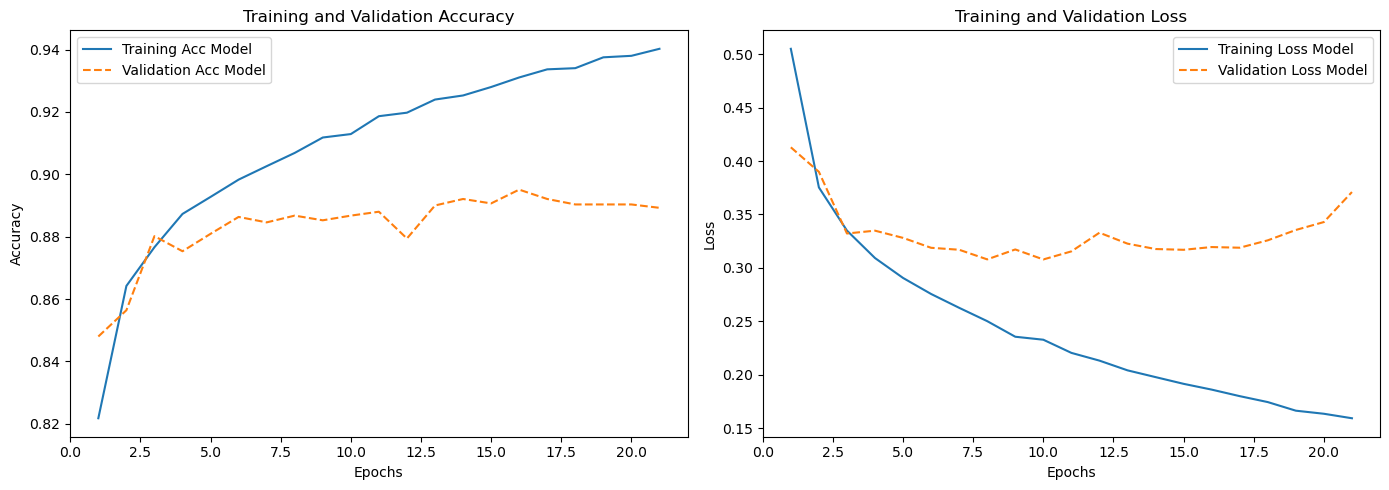

In [7]:
plot_model_history([history], ['Model'])


Here, both the loss and accuracy metrics for the validation set level off before the training loss and accuracy. The training loss seems to still be decreasing while the accuracy increasing, at the time that the EarlyStopping function stops the epochs from running further. Visually, it seems like the training set does not predict the validation model very well; however, they are not very far off in their accuracy and loss metrics, so this model my not be bad. 

### 4. Experiment with different network architectures and settings (number of hidden layers, number of nodes, regularization, etc.)
---


- Train at least 3 models. Explain what you have tried and how it worked.

#### Model 1: Nodes Increased

The first model developed to try different network architextures and settings increases the number of nodes to 512. Increasing the number of nodes allows for the model to capture the relationship between images and labels more clearly. A larger number of nodes can capture more complex patterns in the data, while also improving the learning ability of the model. The addition of nodes can also lead to overfitting, which makes generalizing the results of the data less feasible. Furthermore, additional nodes leads to longer training times, requiring more memory and processing power. 


In [8]:
model1 = Sequential([
    Rescaling(1./255, input_shape=(28, 28, 1)),
    Flatten(),
    Dense(512, activation='relu'),  # adding an increased number of nodes
    Dense(10, activation='softmax')
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model1.summary())

history1 = model1.fit(train_images, train_labels, epochs=25, validation_data=(val_images, val_labels), callbacks=[EarlyStopping(monitor='val_accuracy', patience=5)])


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7835 - loss: 0.6177 - val_accuracy: 0.8442 - val_loss: 0.4214
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8644 - loss: 0.3758 - val_accuracy: 0.8734 - val_loss: 0.3464
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8813 - loss: 0.3242 - val_accuracy: 0.8763 - val_loss: 0.3402
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8897 - loss: 0.3046 - val_accuracy: 0.8754 - val_loss: 0.3378
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8932 - loss: 0.2873 - val_accuracy: 0.8837 - val_loss: 0.3192
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8997 - loss: 0.2708 - val_accuracy: 0.8859 - val_loss: 0.3129
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9051 - loss: 0.2530 - val_accuracy: 0.8734 - val_loss: 0.3441
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9084 - loss: 0.24

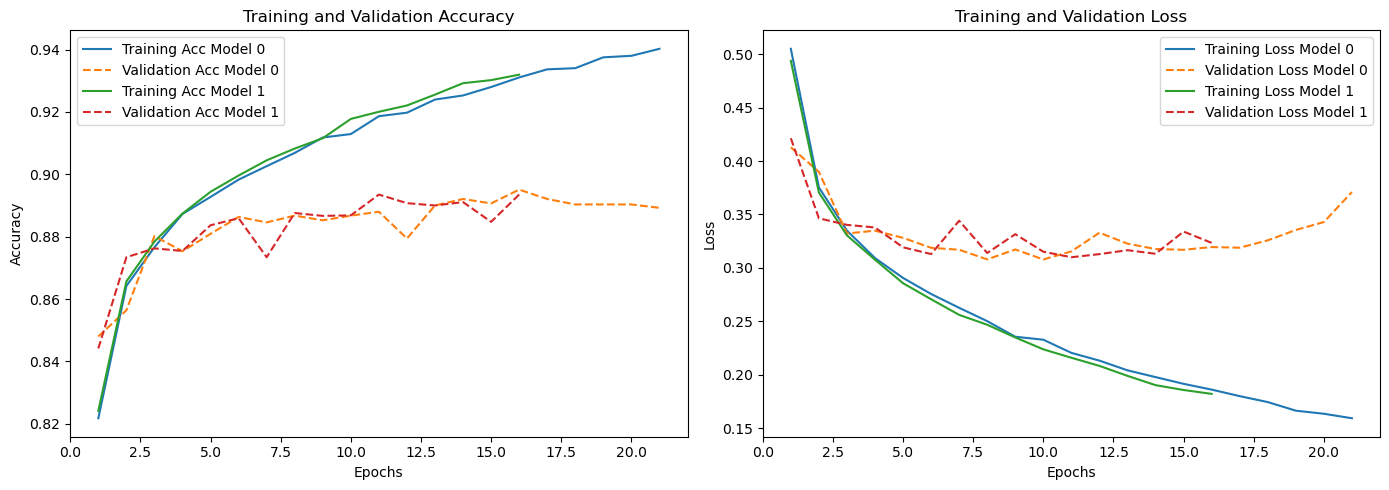

In [9]:
plot_model_history([history, history1], ['Model 0', 'Model 1'])

The initial model, `Model 0`, performs better since the performance metric results are quite similar to the increased nodes model. The increased number of nodes did not seem to have a significant influence on increasing the validation accuracy or decreasing the validation loss. `Model 1: Increased Nodes` yeilded very similar results to `Model 0`

#### Model 2: Added Dropout and Increased Nodes
---

The second model maintains the increased number of nodes, while added a Dropout. The dropout is intended to help mitigate the risk of overfitting by randomly setting a portion of the network's neurons to 0 during the training the process. 

In [10]:
model2 = Sequential([
    Rescaling(1./255, input_shape=(28, 28, 1)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # adding dropout
    Dense(10, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model2.summary())

history2 = model2.fit(train_images, train_labels, epochs=25, validation_data=(val_images, val_labels), callbacks=[EarlyStopping(monitor='val_accuracy', patience=5)])


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7467 - loss: 0.7183 - val_accuracy: 0.8509 - val_loss: 0.4154
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8360 - loss: 0.4514 - val_accuracy: 0.8469 - val_loss: 0.4018
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8469 - loss: 0.4199 - val_accuracy: 0.8619 - val_loss: 0.3689
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8573 - loss: 0.3877 - val_accuracy: 0.8754 - val_loss: 0.3447
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8613 - loss: 0.3788 - val_accuracy: 0.8704 - val_loss: 0.3576
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8643 - loss: 0.3685 - val_accuracy: 0.8785 - val_loss: 0.3394
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8663 - loss: 0.3596 - val_accuracy: 0.8715 - val_loss: 0.3476
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8744 - loss: 0.34

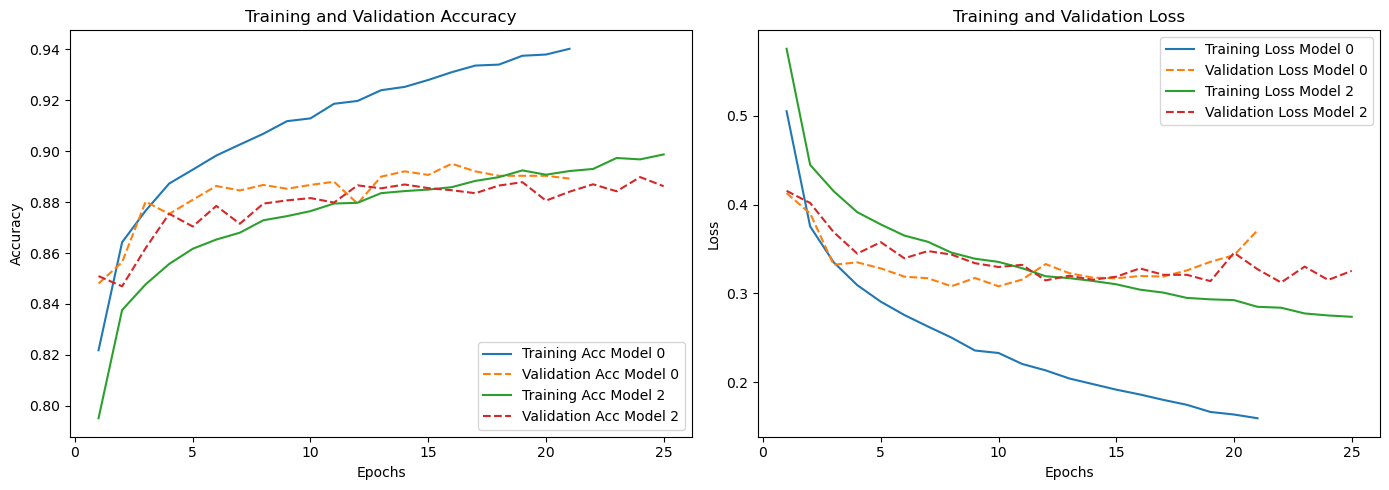

In [11]:
plot_model_history([history, history2], ['Model 0', 'Model 2'])

The model seems to have improved the overfitting issue by narrowing the gap between the training and validation accuracy metric; nevertheless, `Model 0` still performs better as it is more simple and does not have a very large overfitting issue, and has higher scores than `Model 2: Dropout`

#### Model 3: Adding a hidden layer
---

The idea behind adding a hidden layer is backed by increasing the model complexity in order to improve the model's generalization capabilities. Furthermore, adding a hidden layer increases the model's depth, which can also enhance the model's abilities to be trained on more complex data. 

In [12]:
model3 = Sequential([
    Rescaling(1./255, input_shape=(28, 28, 1)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),  # adding additional hidden layer
    Dense(10, activation='softmax')
])

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model3.summary())

history3 = model3.fit(train_images, train_labels, epochs=25, validation_data=(val_images, val_labels), callbacks=[EarlyStopping(monitor='val_accuracy', patience=5)])


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7781 - loss: 0.6186 - val_accuracy: 0.8573 - val_loss: 0.3855
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8612 - loss: 0.3776 - val_accuracy: 0.8674 - val_loss: 0.3722
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8772 - loss: 0.3362 - val_accuracy: 0.8681 - val_loss: 0.3671
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8892 - loss: 0.3048 - val_accuracy: 0.8823 - val_loss: 0.3186
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8948 - loss: 0.2836 - val_accuracy: 0.8850 - val_loss: 0.3195
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8994 - loss: 0.2665 - val_accuracy: 0.8807 - val_loss: 0.3213
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9046 - loss: 0.2550 - val_accuracy: 0.8863 - val_loss: 0.3121
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9087 - loss: 0.24

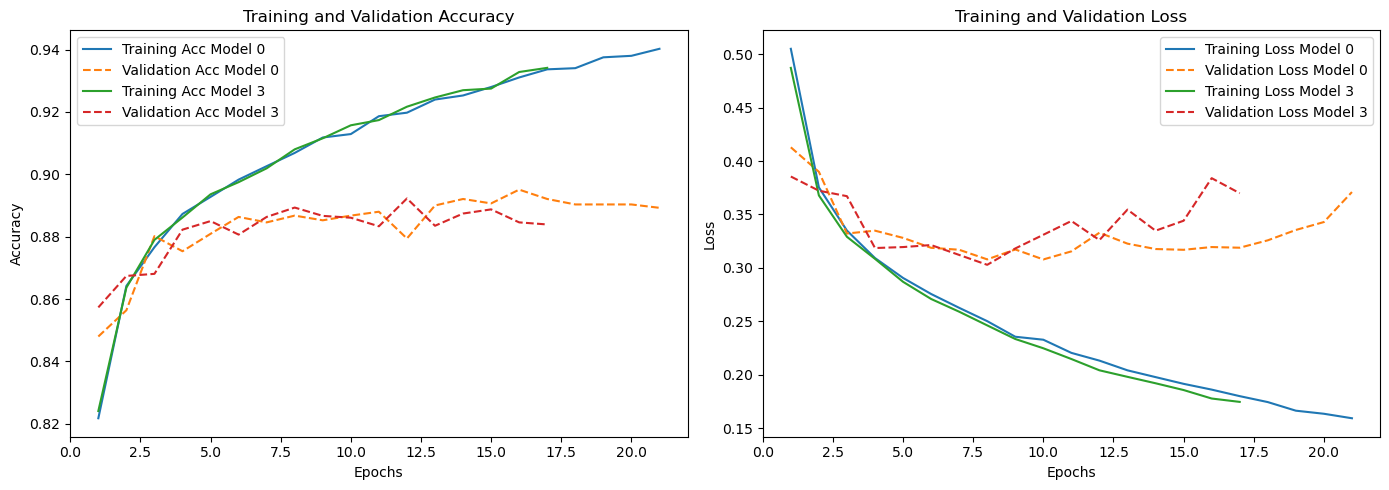

In [13]:
plot_model_history([history, history3], ['Model 0', 'Model 3'])

The addition of the hidden layer did not seem to drastically improve the accuracy or loss metrics in the model. This model seems to perform very similarly to `Model 0`, but as a result of `Model 0` being simpler than `Model 4: Additional Layer`, `Model 0` would still be preferred.

#### Model 4: Extra Layer, Dropout, and Increased Nodes
---

The following model now incorporates components from the previous three models to experiment and see how adding an additional layer, additional dropout, and increasing the nodes in both layers will influence the accuracy and loss of the model. 

In [14]:
model4 = Sequential([
    Rescaling(1./255, input_shape=(28, 28, 1)),
    Flatten(),
    Dense(512, activation='relu'),  # increasing number of nodes
    Dropout(0.5),  # adding dropout
    Dense(512, activation='relu'),  # increasing number of nodes...again
    Dropout(0.5),  # adding dropout...again
    Dense(10, activation='softmax')
])

model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model4.summary())

history4 = model4.fit(train_images, train_labels, epochs=25, validation_data=(val_images, val_labels), callbacks=[EarlyStopping(monitor='val_accuracy', patience=5)])


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7086 - loss: 0.8055 - val_accuracy: 0.8329 - val_loss: 0.4545
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8165 - loss: 0.5076 - val_accuracy: 0.8557 - val_loss: 0.3998
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8326 - loss: 0.4605 - val_accuracy: 0.8561 - val_loss: 0.3952
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8408 - loss: 0.4429 - val_accuracy: 0.8562 - val_loss: 0.3951
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8445 - loss: 0.4307 - val_accuracy: 0.8662 - val_loss: 0.3674
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8473 - loss: 0.4257 - val_accuracy: 0.8655 - val_loss: 0.3587
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8523 - loss: 0.4101 - val_accuracy: 0.8519 - val_loss: 0.4016
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8588 - loss

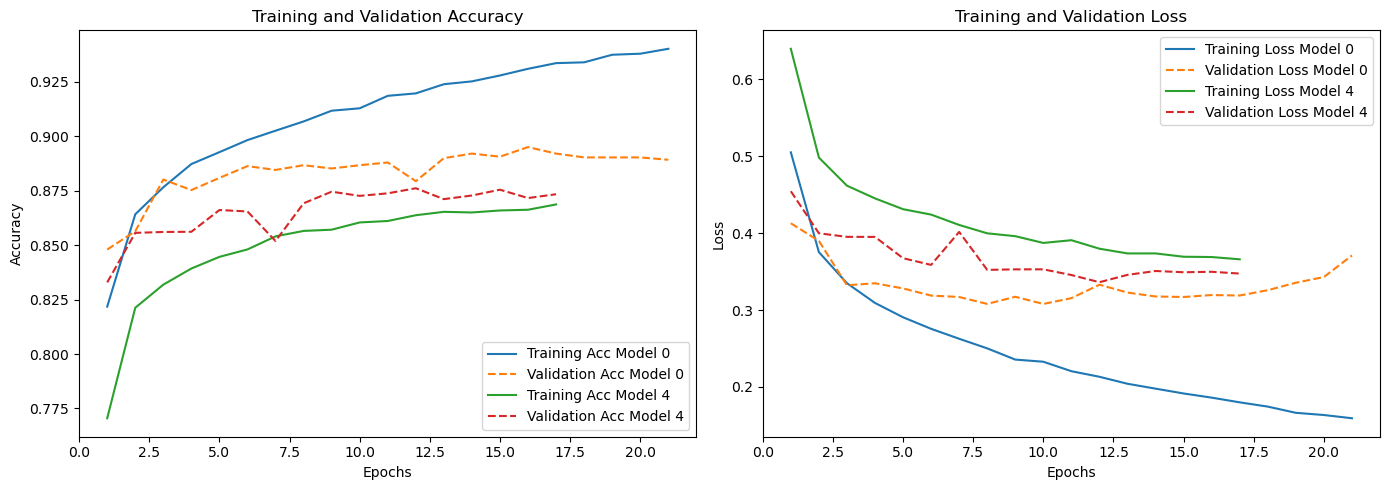

In [15]:
plot_model_history([history, history4], ['Model 0', 'Model 4'])

`Model 4` does show improvement on the overfitting issue, with both the training and validation sets having very similar accuracy and loss scores. This suggests that the dropout does help mitigate overfitting successfully in this dataset. However, since `Model 0` is so simple, it is still the preferred model at this time. 

#### Model 5: Batch Normalization
---

The following model incorporates batch normalization, a technique aimed at improving the speed, performance, and stability of neural networks. Batch Normalization normlizes the output of a previous layer by subtracting the batch mean and dividing by the batch standard deviation. This methods operates per-feature, ensuring that they have a mean of 0 and a standard deviation of 1. This method is aimed at improving the performance of the model, reducing the overfitting, and decreasing the training time. 

In [16]:
model5 = Sequential([
    Rescaling(1./255, input_shape=(28, 28, 1)), 
    Flatten(),
    Dense(256, activation='relu'),  # reducing number of nodes
    BatchNormalization(),  # adding batch normalization
    Dropout(0.3),  # reducing dropout rate
    Dense(256, activation='relu'),  # reducing number of nodes...again
    BatchNormalization(),  # adding batch normalization...again
    Dropout(0.3),  # reducing dropout rate...again
    Dense(10, activation='softmax')
])

model5.compile(optimizer=Adam(learning_rate=0.001),  # adjusting the learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model5.summary())

history5 = model5.fit(train_images, train_labels, epochs=25, validation_data=(val_images, val_labels),
                      callbacks=[EarlyStopping(monitor='val_accuracy', patience=5)])


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,370 (1.04 MB)

 Trainable params: 270,346 (1.03 MB)

 Non-trainable params: 1,024 (4.00 KB)

None
Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7489 - loss: 0.7371 - val_accuracy: 0.8412 - val_loss: 0.4422
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8262 - loss: 0.4875 - val_accuracy: 0.8438 - val_loss: 0.4173
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8320 - loss: 0.4584 - val_accuracy: 0.8186 - val_loss: 0.4665
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8411 - loss: 0.4388 - val_accuracy: 0.8430 - val_loss: 0.4063
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8482 - loss: 0.4222 - val_accuracy: 0.8593 - val_loss: 0.3786
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8539 - loss: 0.4031 - val_accuracy: 0.8723 - val_loss: 0.3549
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8616 - loss: 0.3836 - val_accuracy: 0.8628 - val_loss: 0.3697
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8607 - loss: 0.38

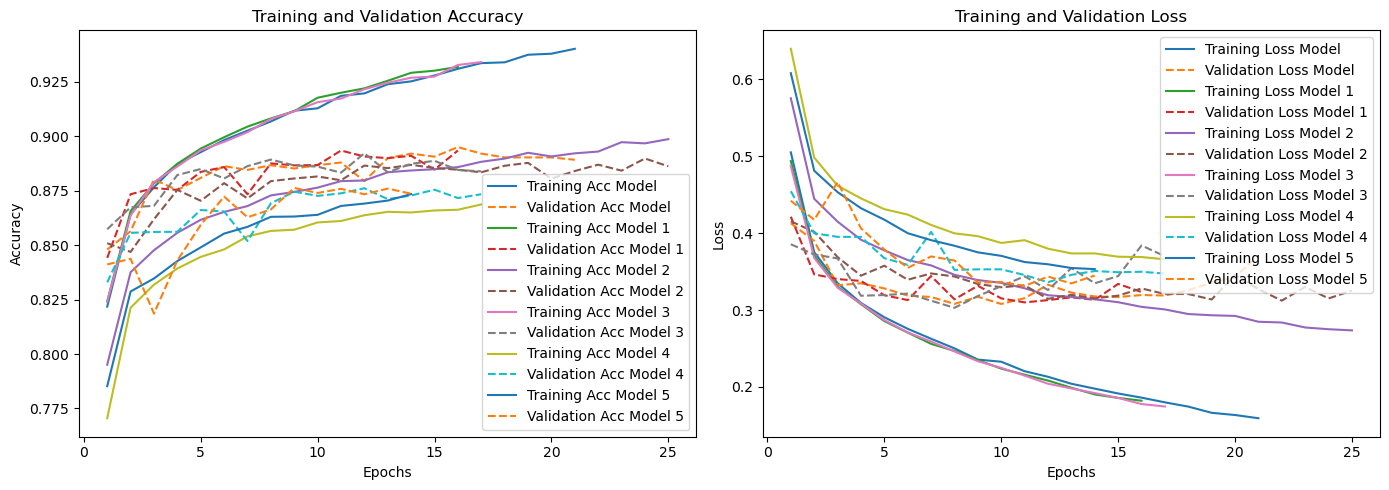

In [17]:
plot_model_history([history, history1, history2, history3, history4, history5], ['Model', 'Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'])


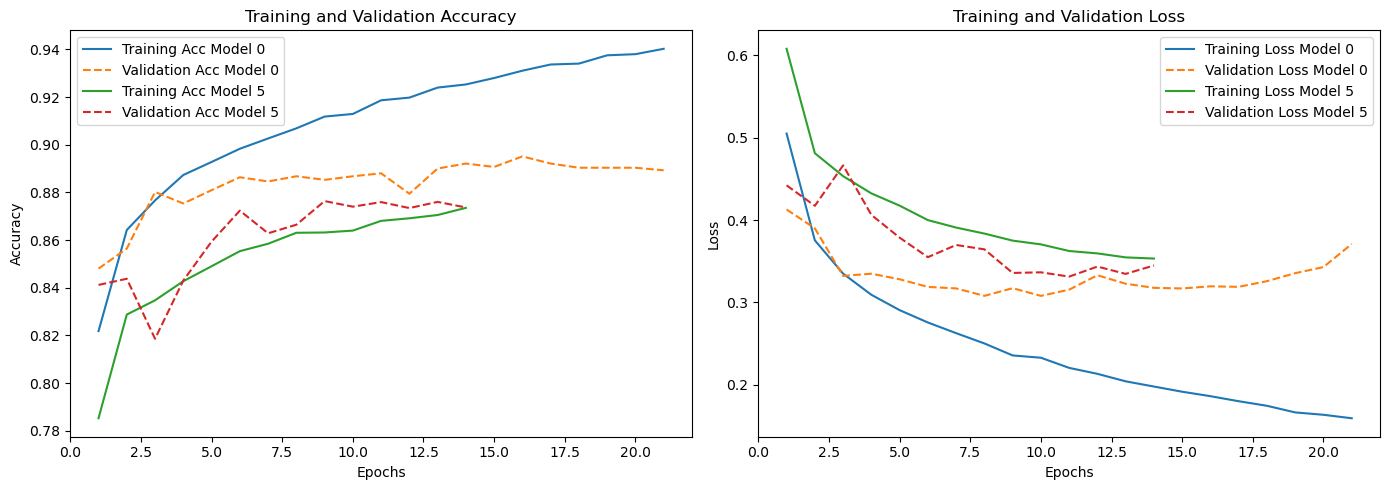

In [18]:
plot_model_history([history, history5], ['Model 0', 'Model 5'])

### 5. Try to improve the accuracy of your model by using convolution
---

- Train at least two different models (you can vary the number of convolutional and pooling layers or whether you include a fully connected layer before the output, etc.).

#### Model 6: Adding Convolution, Pooling, and Fully Connected Layer

This model adds a convolutional layer, pooling layer, and a fully connected hidden layer before the output. 

The purpose of the convolutional layer is to better learn spatial hierarchies of features from the images. This is done by applying learnable filters to the images. These filters can capture various aspects of the images, such as edges, tectures, or patterns, and can improve the accuracy of the model. This can easily lead to overfitting. 

The purpose of pooling layers is to reduce the spatial dimensions of the images for the next convolutional layer.

In [19]:
model6 = Sequential([
    Rescaling(1./255, input_shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),  # Convolutional layer
    MaxPooling2D((2, 2)),  # Pooling layer
    Flatten(),  # converting 3D feature maps to 1D feature vectors
    Dense(256, activation='relu'),
    Dense(10, activation='softmax') 
])

model6.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

print(model6.summary())

history6 = model6.fit(train_images, train_labels, epochs=25,
                      validation_data=(val_images, val_labels),
                      callbacks=[EarlyStopping(monitor='val_accuracy', patience=5)])


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │     1,384,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,387,594 (5.29 MB)

 Trainable params: 1,387,594 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.8118 - loss: 0.5292 - val_accuracy: 0.8878 - val_loss: 0.3075
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9032 - loss: 0.2654 - val_accuracy: 0.8857 - val_loss: 0.3058
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9230 - loss: 0.2116 - val_accuracy: 0.9084 - val_loss: 0.2516
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9357 - loss: 0.1751 - val_accuracy: 0.9083 - val_loss: 0.2561
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9482 - loss: 0.1396 - val_accuracy: 0.9168 - val_loss: 0.2437
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9607 - loss: 0.1104 - val_accuracy: 0.9149 - val_loss: 0.2583
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9684 - loss: 0.0888 - val_accuracy: 0.9145 - val_loss: 0.2757
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.9

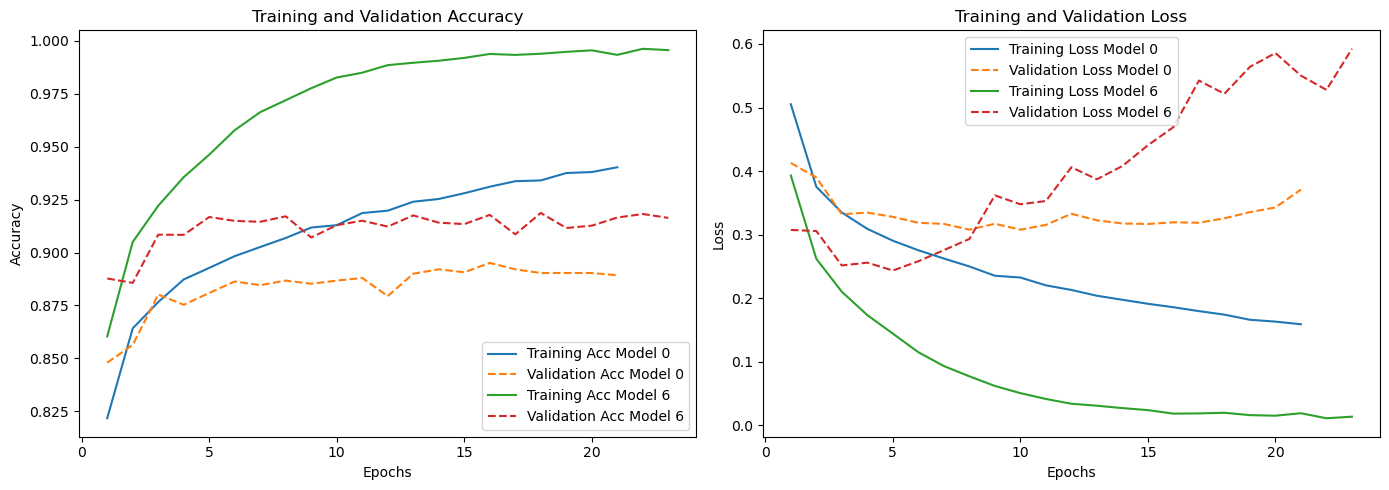

In [20]:
plot_model_history([history, history6], ['Model 0', 'Model 6'])

`Model 6` shows a significant increase in the accuracy scores and decrease in loss score in the training model; however, this is not reflected in the validation metrics. This suggests the model is drastically overfitting, and `Model 0` would still be preferred. Earlier, we saw the improvement Dropouts made to the overfitting issue, so perhaps that will help us here. The next model will attempt to decrease the overfitting issue using dropouts. 

#### Model 7: Convolution, Pooling, and Fully Connected Layers with Dropouts to improve Overfitting
---

This model builds on the previous model by including a dropout to improve the overfitting issue. Additionally, multiple convolutional and pooling layers are added, including a fully connected layer. 

In [21]:
model7 = Sequential([
    Rescaling(1./255, input_shape=(28, 28, 1)),
    Conv2D(64, (3, 3), activation='relu'),  # increasing the number of filters
    MaxPooling2D((2, 2)),
    Dropout(0.3), # adding dropout
    Conv2D(64, (3, 3), activation='relu'),  # adding additional convolutional layer
    MaxPooling2D((2, 2)),
    Dropout(0.3), # adding another dropout
    Flatten(),
    Dense(256, activation='relu'),  # adding smaller dense layer before output
    Dropout(0.5), # aaaaaand anotha one
    Dense(10, activation='softmax')
])

model7.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

print(model7.summary())

history7 = model7.fit(train_images, train_labels, epochs=25,
                      validation_data=(val_images, val_labels),
                      callbacks=[EarlyStopping(monitor='val_accuracy', patience=5)])


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_7 (Rescaling)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 449,994 (1.72 MB)

 Trainable params: 449,994 (1.72 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.7191 - loss: 0.7696 - val_accuracy: 0.8652 - val_loss: 0.3715
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8569 - loss: 0.3958 - val_accuracy: 0.8867 - val_loss: 0.3069
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8747 - loss: 0.3501 - val_accuracy: 0.8957 - val_loss: 0.2814
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8826 - loss: 0.3208 - val_accuracy: 0.9006 - val_loss: 0.2647
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.8904 - loss: 0.2976 - val_accuracy: 0.9013 - val_loss: 0.2625
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8936 - loss: 0.2826 - val_accuracy: 0.9071 - val_loss: 0.2504
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8980 - loss: 0.2756 - val_accuracy: 0.9087 - val_loss: 0.2437
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9

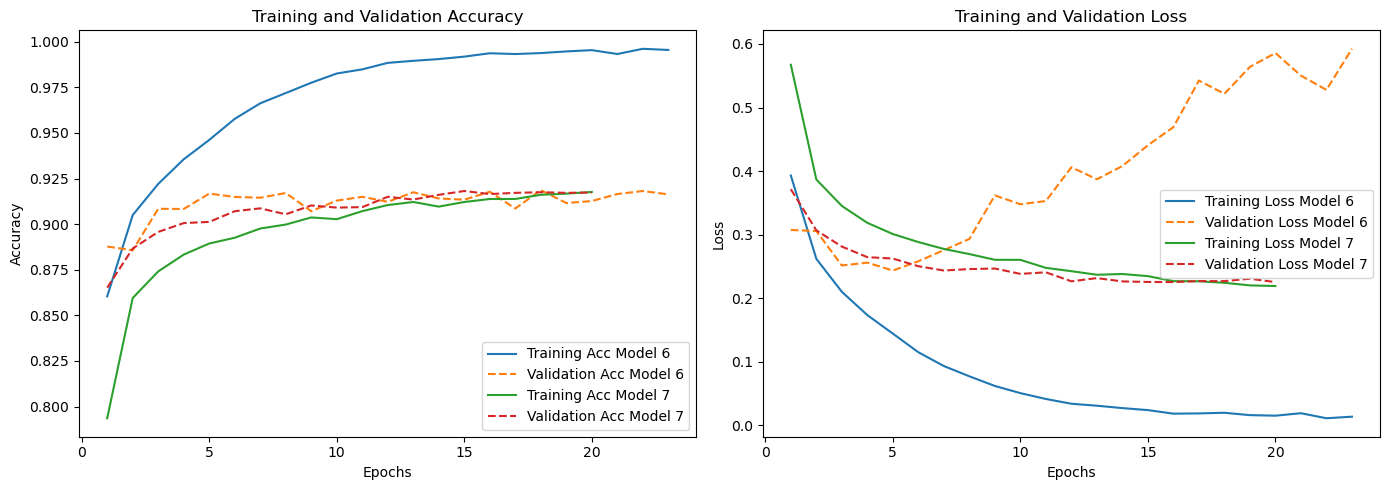

In [22]:
plot_model_history([history6, history7], ['Model 6', 'Model 7'])

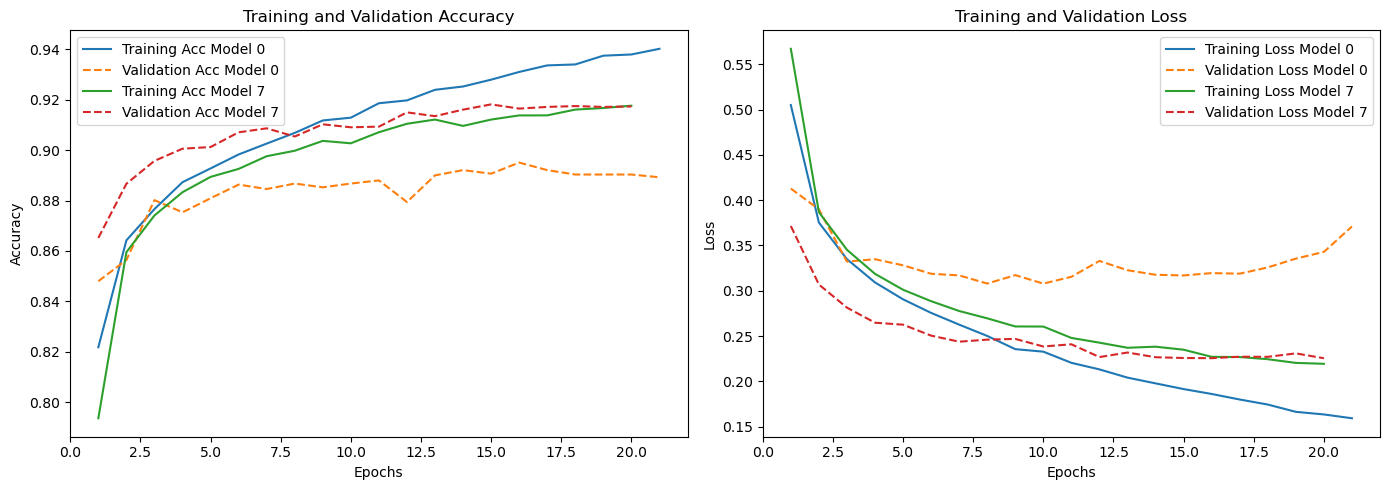

In [23]:
plot_model_history([history, history7], ['Model 0', 'Model 7'])

`Model 7` shows improvement in the overfitting issue as seen in `Model 6`. As a result in this improvement to overfitting, Model 7's metrics seem to be performing better than `Model 0` as a result of the convolutional and pooling layers. This is the preferred model for predicting the categories of the images. 

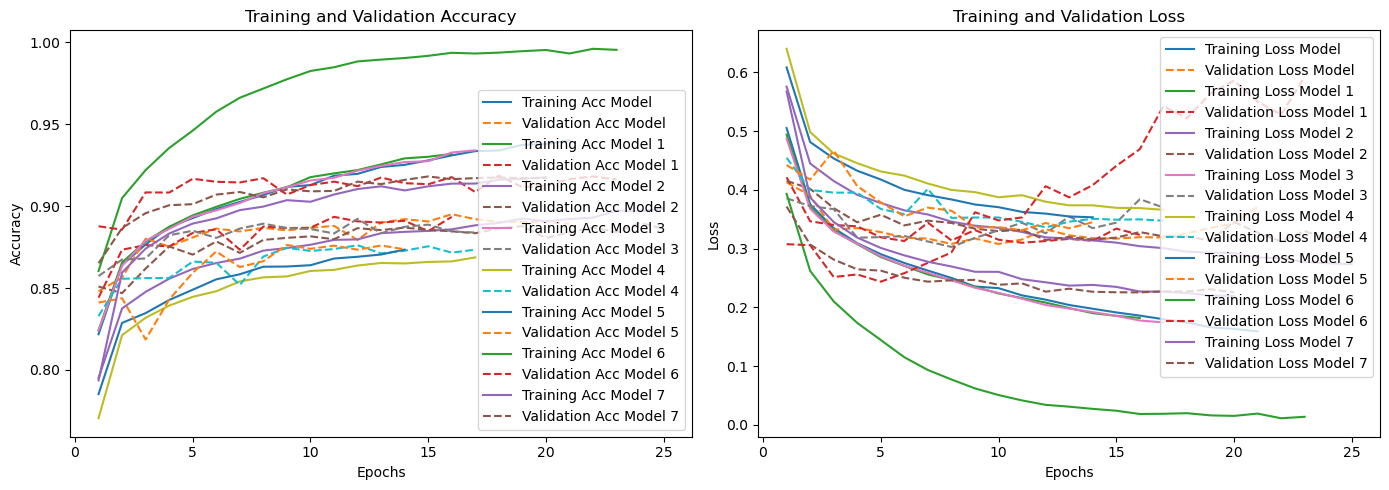

In [24]:
plot_model_history([history, history1, history2, history3, history4, history5, history6, history7], ['Model', 'Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7'])

### 6. Try to use a pre-trained network to improve accuracy.
---

The following procedure attempts to use the MobileNetV2 pretrained image dataset to predict on our image dataset. There was an issue with the differences in image size when setting up the model. To fix this, padding was added to our image set. This can cause issues in the predictive power of the model, as this padding will add additional noise to the images. 

In [25]:
def pad_images(images):

    if images.ndim == 3:
        images = images[..., tf.newaxis]

    # 2 pixels on top, bottom, left, and right, and no padding on the batch and channels
    padding = [[0, 0], [2, 2], [2, 2], [0, 0]]
    
    # applying constant padding
    images_padded = tf.pad(images, paddings=padding, mode='CONSTANT', constant_values=0)
    return images_padded

train_images_padded = pad_images(train_images)
val_images_padded = pad_images(val_images)


In [26]:
# loading MobileNetV2 without the top layer to use as a base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3), alpha=1.0)

# freezing the base model layers
base_model.trainable = False

model8 = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Reduces each feature map to a single value
    BatchNormalization(),
    Dense(1024, activation='relu'), # high number of nodes
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

print(model8.summary())

# compiling the enhanced model
model8.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])


C:\Users\iandr\AppData\Local\Temp\ipykernel_17864\2767747608.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3), alpha=1.0)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

None


In [27]:
# converting images to rgb
def convert_to_rgb(images):
    images_rgb = tf.repeat(images, 3, axis=-1)
    return images_rgb

train_images_rgb = convert_to_rgb(train_images_padded)
val_images_rgb = convert_to_rgb(val_images_padded)


In [28]:
# fitting the model
history8 = model8.fit(
    train_images_rgb, train_labels,
    epochs=10,
    validation_data=(val_images_rgb, val_labels),
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=3)])


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 75s 44ms/step - accuracy: 0.4477 - loss: 1.4920 - val_accuracy: 0.5298 - val_loss: 1.2593
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 63s 42ms/step - accuracy: 0.5122 - loss: 1.3160 - val_accuracy: 0.5375 - val_loss: 1.2592
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 65s 44ms/step - accuracy: 0.5238 - loss: 1.2805 - val_accuracy: 0.5350 - val_loss: 1.2326
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 67s 45ms/step - accuracy: 0.5278 - loss: 1.2652 - val_accuracy: 0.5441 - val_loss: 1.2235
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 59s 40ms/step - accuracy: 0.5308 - loss: 1.2592 - val_accuracy: 0.5466 - val_loss: 1.2126
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 64s 43ms/step - accuracy: 0.5355 - loss: 1.2400 - val_accuracy: 0.5505 - val_loss: 1.1992
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 59s 39ms/step - accuracy: 0.5416 - loss: 1.2348 - val_accuracy: 0.5520 - val_loss: 1.1974
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 61s 41ms/step - accuracy: 0.5433 -

This model does not seem to fit our data very well at all. With an accuracy of 0.54 and a loss over 1, this model is basically guessing. This could be a result of the added padding, but it is also a testimate to how difficult it is to create a pretrained dataset that is able to be applied on other datasets for image prediction. 

### 7. Select a final model and evaluate it on the test set. How does the test error compare to the validation error?
---

The model selected was the 7th model, with the added convolutional, pooling, dropout, and fully connected hidden layers. This model had the best combination of accuracy and loss scores while reducing overfitting. 

In [31]:
from tensorflow.keras.losses import MeanSquaredError
import pandas as pd

models = [model, model1, model2, model3, model4, model5, model6, model7]
model_histories = [history, history1, history2, history3, history4, history5, history6, history7] 
results = []

mse = MeanSquaredError()

# looping through each model, its history, and evaluating it on the test set
for i, (model, history) in enumerate(zip(models, model_histories)):
    # test set evaluation
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    
    # predictions for MSE calculation
    test_predictions = model.predict(test_images)
    # assuming test_labels are one-hot encoded, converting predictions for MSE calculation
    test_mse = mse(test_labels, test_predictions).numpy()
    
    # extracting training and validation loss and accuracy from the model's history
    training_loss = history.history['loss'][-1]
    training_accuracy = history.history['accuracy'][-1]
    validation_loss = history.history['val_loss'][-1]
    validation_accuracy = history.history['val_accuracy'][-1]
    
    # appending the results
    results.append({
        'Model': f'Model{i}',
        'Training Loss': training_loss,
        'Training Accuracy': training_accuracy,
        'Validation Loss': validation_loss,
        'Validation Accuracy': validation_accuracy,
        'Test Loss': test_loss,
        'Test Accuracy': test_accuracy,
        'Test MSE': test_mse
    })

results_df = pd.DataFrame(results)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [32]:
results_df

,Model,Training Loss,Training Accuracy,Validation Loss,Validation Accuracy,Test Loss,Test Accuracy,Test MSE
0,Model0,0.159150,0.940229,0.370988,0.889250,0.241583,0.9139,0.012384
1,Model1,0.181970,0.931938,0.323383,0.893500,0.349837,0.8900,0.016377
2,Model2,0.273494,0.898729,0.325238,0.886250,0.344006,0.8829,0.016931
3,Model3,0.174464,0.934125,0.369907,0.883917,0.394902,0.8829,0.017341
4,Model4,0.365952,0.868729,0.347417,0.873417,0.368259,0.8689,0.018789
5,Model5,0.353225,0.873500,0.344833,0.873667,0.365301,0.8701,0.018734
6,Model6,0.013830,0.995500,0.592348,0.916333,0.628959,0.9151,0.015001
7,Model7,0.219290,0.917646,0.225436,0.917333,0.241583,0.9139,0.012384


Here, the best model was determined to be `Model 7`. This is as a result of having very similar scores in the validation metrics as compared to the training metrics, while maintaining the highest validation accuracy. This is reflected in having the best test MSE as well. 

In [33]:
# calculating the MSE on the validation and test set for comparison
mse = MeanSquaredError()

# predicting on the validation set
val_predictions = model7.predict(val_images)
validation_mse = mse(val_labels, val_predictions).numpy()

# predicting on the test set
test_predictions = model7.predict(test_images)
test_mse = mse(test_labels, test_predictions).numpy()

print(f"Test MSE: {test_mse:.4f}")
print(f"Validation MSE: {validation_mse:.4f}")


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test MSE: 0.0124
Validation MSE: 0.0120


Here, we used the MSE as an error score to best interpret the model. When set to predict the test set, model 7 performs very well by having a very similar test MSE score to the validation MSE. This suggests that this model can generalize quite well, and that there are not overfitting issues in this model. 